In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import jax
jax.config.update('jax_platform_name', 'cpu')

In [4]:
from entot.data.data import create_gaussians, create_gaussian_split
from entot.models.models import DiscreteOTModel, SeguyModel
import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp

In [5]:
n_x = 100
n_y = 100
x = np.linspace(-0.3, 1.2, n_x)
y = np.linspace(-0.5, 0.5, n_y)
xx, yy = np.meshgrid(x,y)

x_fl = xx.flatten()
y_fl = yy.flatten()

concat = jnp.transpose(jnp.concatenate((jnp.atleast_2d(x_fl), jnp.atleast_2d(y_fl)), axis=0))
concat.shape

(10000, 2)

# Dataset 1

In [6]:
source, target = create_gaussians(100, 100, var_source=0.2, var_target=0.2)

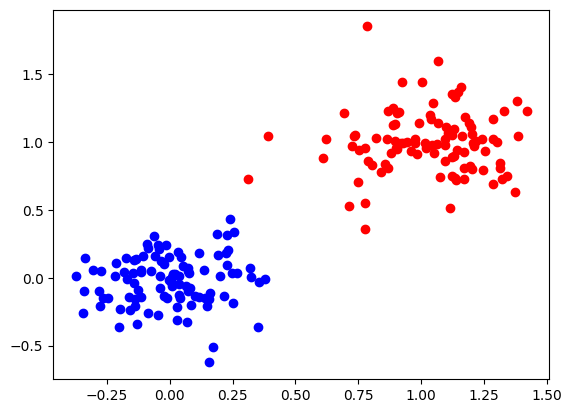

In [7]:
plt.scatter(source[:,0], source[:,1], color="blue")
plt.scatter(target[:, 0], target[:, 1], color="red")

In [8]:
sm = SeguyModel(1.0, 64, 64, iterations=1000, input_dim=2)
sm(source, target)
sm.learn_barycentric_projection(n_iters=1000)

100%|██████████| 1000/1000 [01:46<00:00,  9.38it/s]


{'loss': Array(-1.409552e+12, dtype=float32),
 'd_xy': Array([2.6257861e+20, 2.6257861e+20, 2.6257861e+20, ..., 3.0342038e+20,
        3.0342038e+20, 3.0342038e+20], dtype=float32),
 'H': Array([0.9829084, 0.9728007, 1.0612147, ..., 1.1004633, 0.9865703,
        1.0202075], dtype=float32)}

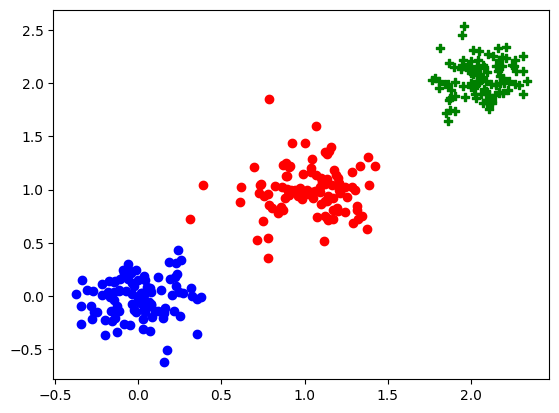

In [54]:
transported = sm.transport(source, forward=True)
plt.scatter(source[:,0], source[:,1], color="blue")
plt.scatter(target[:, 0], target[:, 1], color="red")
plt.scatter(transported[:, 0], transported[:, 1], color="green", marker="P")

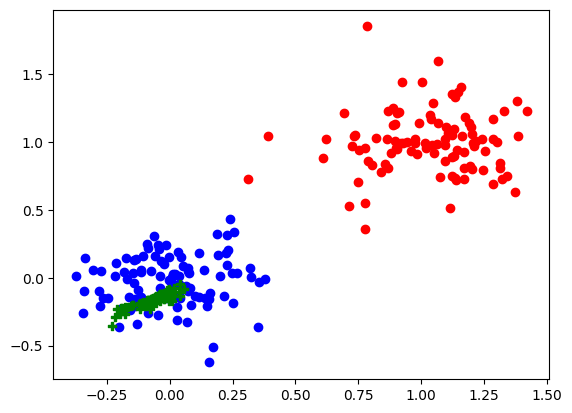

In [55]:
transported = sm.transport(source, forward=False)
plt.scatter(source[:,0], source[:,1], color="blue")
plt.scatter(target[:, 0], target[:, 1], color="red")
plt.scatter(transported[:, 0], transported[:, 1], color="green", marker="P")

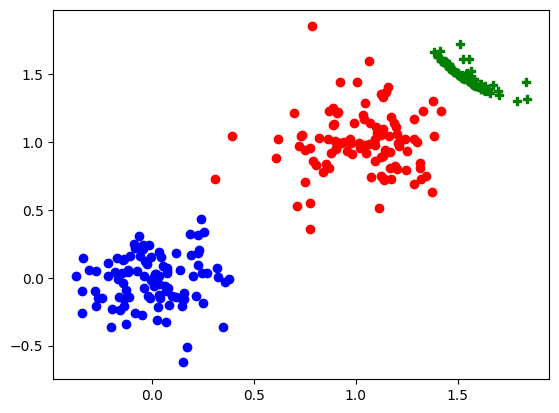

In [56]:
transported = sm.transport(target, forward=True)
plt.scatter(source[:,0], source[:,1], color="blue")
plt.scatter(target[:, 0], target[:, 1], color="red")
plt.scatter(transported[:, 0], transported[:, 1], color="green", marker="P")

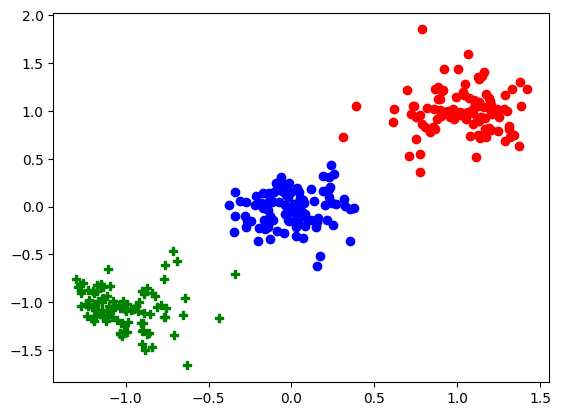

In [57]:
transported = sm.transport(target, forward=False)
plt.scatter(source[:,0], source[:,1], color="blue")
plt.scatter(target[:, 0], target[:, 1], color="red")
plt.scatter(transported[:, 0], transported[:, 1], color="green", marker="P")

In [48]:
transported_mlp = sm.transport_mlp()

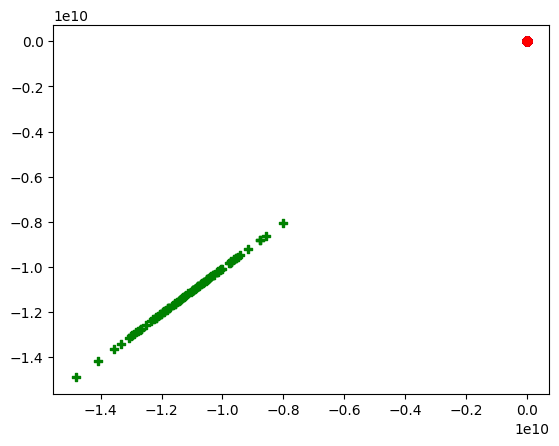

In [49]:
plt.scatter(source[:,0], source[:,1], color="blue")
plt.scatter(target[:, 0], target[:, 1], color="red")
plt.scatter(transported_mlp[:, 0], transported_mlp[:, 1], color="green", marker="P")

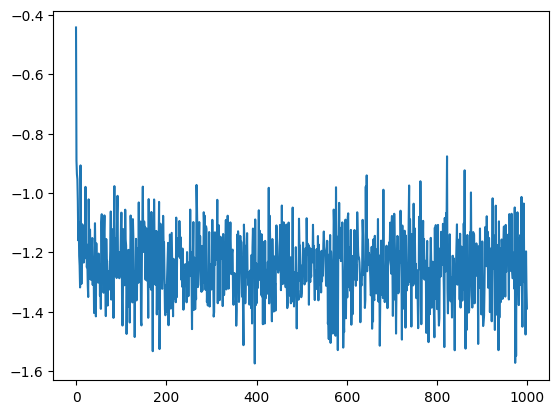

In [50]:
plt.plot(np.arange(len(sm.metrics["obj"])), sm.metrics["obj"])

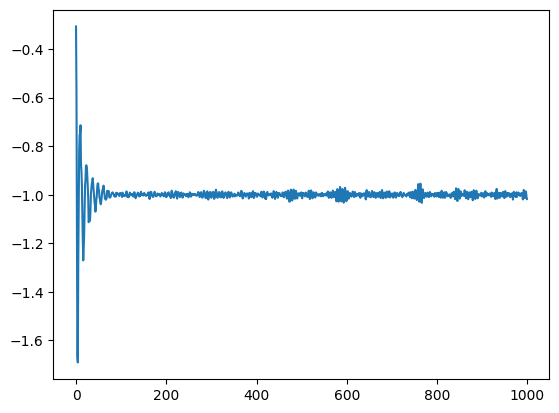

In [51]:
plt.plot(np.arange(len(sm.metrics["term"])), sm.metrics["term"])

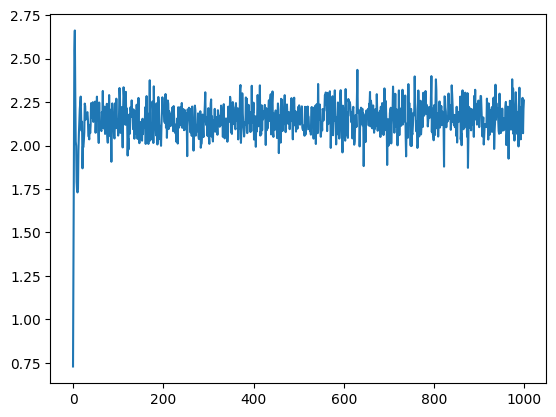

In [52]:
plt.plot(np.arange(len(sm.metrics["f_mean"])), sm.metrics["f_mean"])

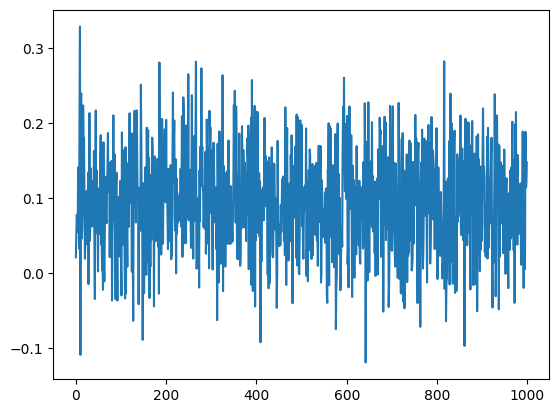

In [53]:
plt.plot(np.arange(len(sm.metrics["g_mean"])), sm.metrics["g_mean"])

In [16]:
hessian_source = sm.get_hessians_f(source)

In [17]:
traces = jnp.trace(hessian_source, axis1=1, axis2=2)
sizes = jnp.maximum(traces, 0.5)
erroneous = np.asarray(traces < 0)

In [18]:
np.sum(erroneous)

100

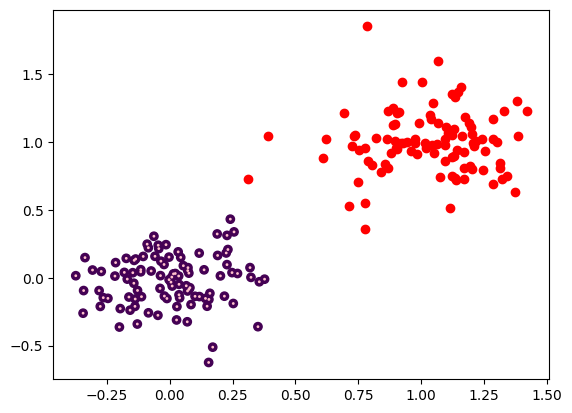

In [19]:
plt.scatter(source[:,0], source[:,1], c=sizes)
plt.scatter(source[:,0], source[:,1], color="pink", s=np.asarray(erroneous).astype(float))
plt.scatter(target[:, 0], target[:, 1], color="red")

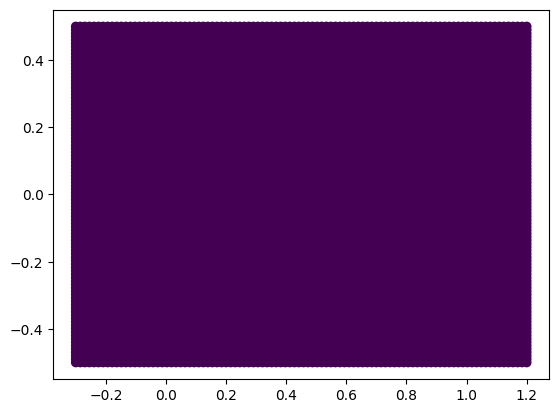

In [20]:
hessian_f = sm.get_hessians_f(concat)

traces = jnp.trace(hessian_f, axis1=1, axis2=2)
sizes = jnp.maximum(traces, 0.5)
erroneous = np.asarray(traces < 0)#.astype(float)

plt.scatter(concat[:,0], concat[:,1], c=sizes)

# Dataset 2

In [21]:
source, target = create_gaussian_split(100, 90, var_source=0.1, var_target=0.1, seed=1)

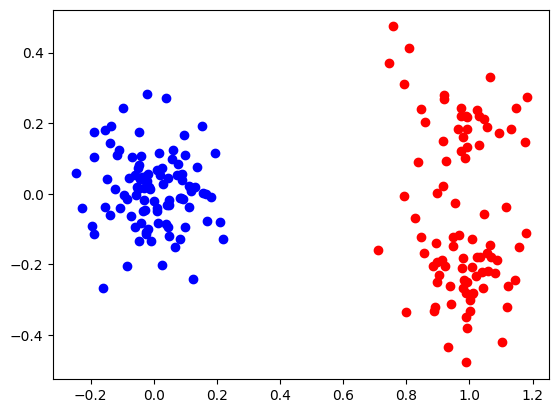

In [22]:
plt.scatter(source[:,0], source[:,1], color="blue")
plt.scatter(target[:, 0], target[:, 1], color="red")

In [23]:
sm = SeguyModel(1.0, 64, 64, iterations=1000, input_dim=2)
sm(source, target)
sm.learn_barycentric_projection(n_iters=1000)

100%|██████████| 1000/1000 [01:45<00:00,  9.45it/s]


{'loss': Array(-1.3385668e+12, dtype=float32),
 'd_xy': Array([1.9149571e+20, 1.9149571e+20, 1.9149571e+20, ..., 2.2148749e+20,
        2.2148749e+20, 2.2148749e+20], dtype=float32),
 'H': Array([1.0494714, 1.0222442, 1.046779 , ..., 0.9930345, 1.0223225,
        1.0389122], dtype=float32)}

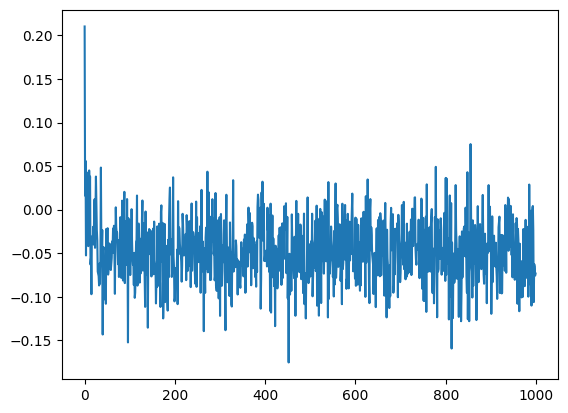

In [24]:
plt.plot(np.arange(len(sm.metrics["obj"])), sm.metrics["obj"])

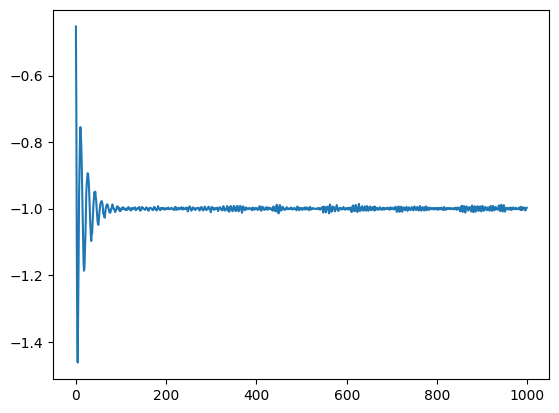

In [25]:
plt.plot(np.arange(len(sm.metrics["term"])), sm.metrics["term"])

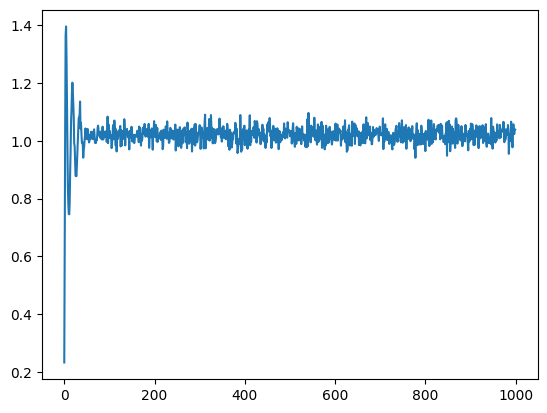

In [26]:
plt.plot(np.arange(len(sm.metrics["f_mean"])), sm.metrics["f_mean"])

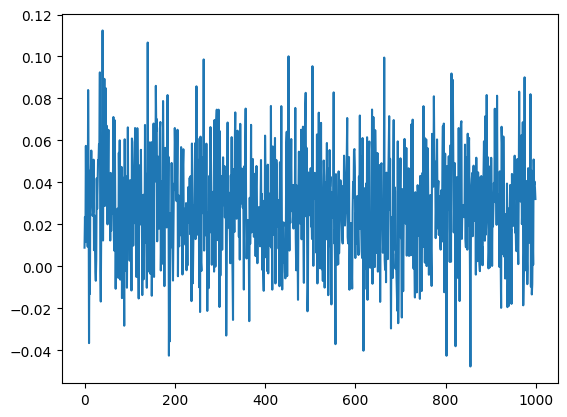

In [27]:
plt.plot(np.arange(len(sm.metrics["g_mean"])), sm.metrics["g_mean"])

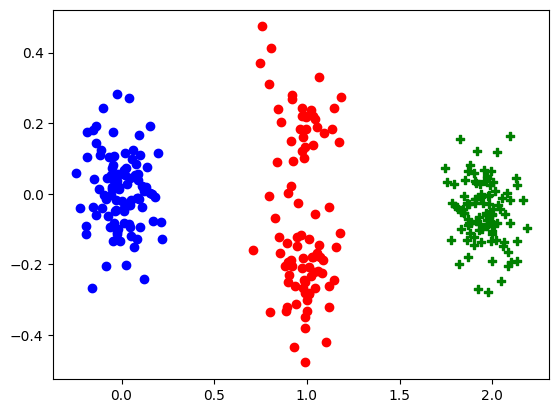

In [28]:
transported = sm.transport()
plt.scatter(source[:,0], source[:,1], color="blue")
plt.scatter(target[:, 0], target[:, 1], color="red")
plt.scatter(transported[:, 0], transported[:, 1], color="green", marker="P")

In [29]:
hessian_source = sm.get_hessians_f(source)

In [30]:
traces = jnp.trace(hessian_source, axis1=1, axis2=2)
sizes = jnp.maximum(traces, 0.5)
erroneous = np.asarray(traces < 0)#.astype(float)

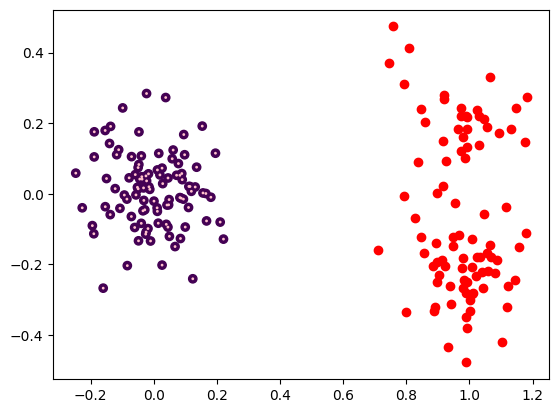

In [31]:
plt.scatter(source[:,0], source[:,1], c=sizes)
plt.scatter(source[:,0], source[:,1], color="pink", s=np.asarray(erroneous).astype(float))
plt.scatter(target[:, 0], target[:, 1], color="red")

In [32]:
hessian_f = sm.get_hessians_f(concat)

In [33]:
traces = jnp.trace(hessian_f, axis1=1, axis2=2)
sizes = jnp.maximum(traces, 0.5)
erroneous = np.asarray(traces < 0)#.astype(float)

In [34]:
sizes.max(), sizes.min()

(Array(0.5, dtype=float32), Array(0.5, dtype=float32))

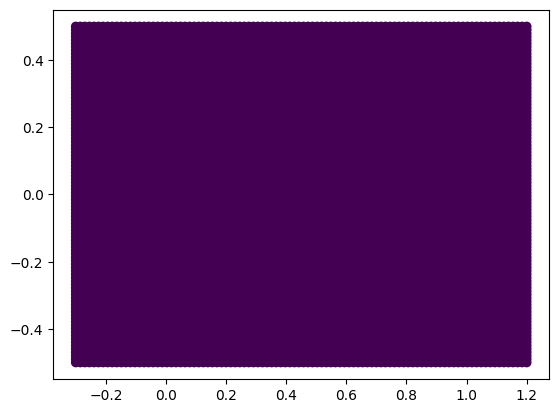

In [35]:
plt.scatter(concat[:,0], concat[:,1], c=sizes)
